In [7]:
%%bash
wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Xw5s_RUMRnvfQtZn1xirsk5r-3qNQI0z' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Xw5s_RUMRnvfQtZn1xirsk5r-3qNQI0z" -O Data.zip && rm -rf /tmp/cookies.txt
unzip Data.zip -d data
mv ./data/annotations ./data/labels

Archive:  Data.zip
  inflating: data/annotations/road0.xml  
  inflating: data/annotations/road1.xml  
  inflating: data/annotations/road10.xml  
  inflating: data/annotations/road100.xml  
  inflating: data/annotations/road101.xml  
  inflating: data/annotations/road102.xml  
  inflating: data/annotations/road103.xml  
  inflating: data/annotations/road104.xml  
  inflating: data/annotations/road105.xml  
  inflating: data/annotations/road106.xml  
  inflating: data/annotations/road107.xml  
  inflating: data/annotations/road108.xml  
  inflating: data/annotations/road109.xml  
  inflating: data/annotations/road11.xml  
  inflating: data/annotations/road110.xml  
  inflating: data/annotations/road111.xml  
  inflating: data/annotations/road112.xml  
  inflating: data/annotations/road113.xml  
  inflating: data/annotations/road114.xml  
  inflating: data/annotations/road115.xml  
  inflating: data/annotations/road116.xml  
  inflating: data/annotations/road117.xml  
  inflating: data/a

In [8]:
import os


try : from ..MyModules.GestionImages import *
except : 
    sys.path.append("../MyModules/")
    from xmlGestion import convert_for_yolo

from fastai.vision.all import *
import numpy as np
import cv2
import torch

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/mass/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-8 Python-3.9.6 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


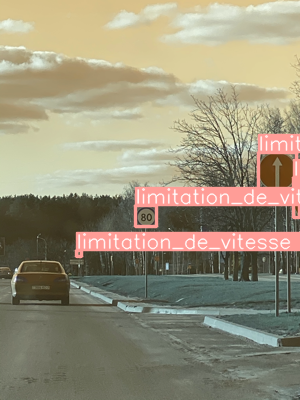

In [9]:
path_to_xml = './data/labels/'
list_of_xml = os.listdir(path_to_xml) 
labels = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']

convert_for_yolo(path_to_xml,list_of_xml,labels)

path = './data/images'
model = torch.hub.load('ultralytics/yolov5', 'custom', path='myYOLO/best.pt', force_reload=True)
imgs = os.listdir('./data/images')
imgname = np.random.choice(imgs)
img = cv2.imread(f'./data/images/{imgname}')
results = model(img).show()